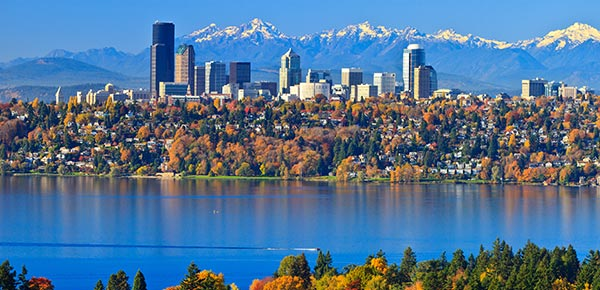

# King County Housing Analysis

Authors : Samuel Robbins, Ziyuan Wang, Anita Camlic

## Overview


For this project we analyzed data about housing sales from the King County Housing Sales Dataset. This dataset contained a vast amount of information about houses sold in King County between in 2014 and 2015. We set our stakeholders as those who are interested in buying, renovating and selling houses, for a profit. First, we looked at the correlations between the features we had, and our dependent variable, price. We identified features that were changeable, and not changeable. We decided to work with these two types of variables in different ways. We defined changeable features as changed you can make to house after purchasing it to increase its sale value. An unchangeable feature is a feature you cannot change after purchasing a home. For example, location. These are the features you should look for before you buy, to increase your profit. We created a multiple linear regression model to analyze the relationships between our features and our prediction value. Our results help assist us in finding recommendations for our clients.

Our recommendations in the end turned out to be, to buy an old home that at has a high quality view, and high square footage of the living space, but a low grade value. We recommend then rennovating this home, to increase the grade. These choices and changes are associated with high market value in a home.

## Business Problem

We have identified our stakeholders as individuals looking to renovate or flip homes for a profit. Our main goal is to increase the profitability of their real estate endeavors. We plan to identify the features of a house that are most correlated with high/low house price. Features that lower house prices are just as important to us as the features that increase house price. This is because, our clients are looking to make a profit with these rennovations. We want to identify the features of houses that lower the price of house, so that we can target houses with these types of features when were are purchasing a house. Then, we can use the features that are correlated with high home prices to be able to increase the price of the house, in order to make a profit when renovating. 

## Data Understanding
Here we will complete exploratory data analysis. This dataset contains information from home sales made in King County Washington in 2014 & 2015. Each row in our dataset represents a house sale. Our target variable is the home price.

In [129]:
# here we are importing all of the tools we need for analysis

import numpy as np
import scipy.stats as stats
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import seaborn as sns
from matplotlib.ticker import FuncFormatter

Here we load in our dataset. This dataset can be found in our Github repository.

In [5]:
df = pd.read_csv('kc_house_data.csv')

Here we are using the .head() method to take a look at our dataframe.

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Here we are using the .info() method in order to take a look at our the datatypes in our dataframe. It looks like there are 21,597 homes that were sold.  The only columns that contains nulls are waterfront, sqft_basement, view and yr_renovated. It seems as though the date column is comprised of string objects, instead of date-time objects. The columns waterfront, view, grade and condition are comprised of string values as well. It is important to note the typed of values we are working with before we start data anlysis so that we can manipulate it into a type that may be easier to handle or work with. For example, date time objects are easier to work with than strings.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Here we are looking into the number of rows that are filled with nulls for each column. It is important that you look at this before any data anlysis so that you can decide what you want to do with the missing data. It seems as though only three columns contain null values. Those columns being waterfront, view, and yr_renovated. Before we proceed, we should figure out how we want to handle these nulls.

In [8]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Since we want to use yr_renovated in future analysis and calulations, we have decided to fill every null value in that column with 0. To us, this will mean that, if the row has a value of zero under the yr_renovated column, we will assume that the house has never been renovated.

<AxesSubplot:>

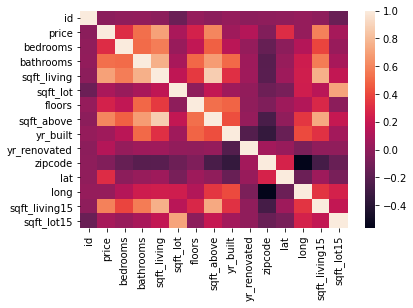

In [9]:
sns.heatmap(df.corr())

Here we take a look at a heatmap of the correlations between the columns in our dataframe. We can see that the lighter colored boxes are the boxes where the two categories are more correlated. The darker boxes represent two categories being less correlated.

# Data Preparation

Here we are prepraring our data for analysis. In this section we deal with our null, and missing values. We decide what we should do with outliers and duplicates.

In [10]:
# filling all null values in the yr_renovated column with 0.0
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

In [11]:
# here we are changing the type of values in the yr_renovated from floats to integers to make calculations easier
df['yr_renovated'] = df['yr_renovated'].astype(int)

Instead of using both yr_renovated and yr_built, we will create a new column labeled age. This will represent the age in years of the house at the time of sale. The values in this column are calculated in the following way: 

if the house was renovated: 

age = year (of sale) - year renovated

or, if the house was never renovated: 

age = year (of sale) - year built

In [12]:
# turning sale dates into years for age calculation to associate age with model
df['date_yr'] = pd.DatetimeIndex(df['date']).year

In [13]:
def age(row):
    if row['yr_renovated'] < 1:
        return  row['date_yr'] - row['yr_built']
    else:
        return row['date_yr']- row['yr_renovated']
        

In [14]:
# creating a new column named age containing a filler value of 0 for now
df['age'] = 0

In [15]:
#df.apply(age, axis=1)

In [16]:
#df2 = df.copy

In [17]:
# here we are using the apply method to fill the age column with the correct age of the house in years at the sale date
df['age'] = df.apply(age, axis=1)

In [18]:
#ensuring that the date_yr and age columns were created
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,2014,23
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [19]:
#df['yr_renovated'].value_counts()

## Outliers

We are using the empirical rule to deal with outliers. The Empirical Rule states that, with normally distributed data, 95% of the data will fall in between 2 standard deviations of the mean. So, we have created an outlier_finder function that will return two values in a tuple. These two values represent our new range of values. We will omit any datapoints outside of this range.

In [20]:
def outlier_finder(column):

    n = float(len(column))
    mean = column.mean()
    std = column.std()

    return (mean - (2* std), mean + (2* std))

We will only implement the above on features that are normally distributed.
Bedrooms, are not normally distributed.

<AxesSubplot:>

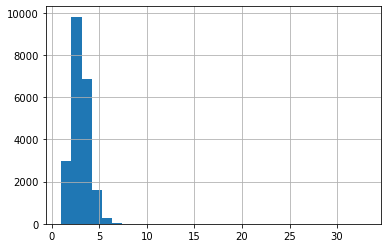

In [21]:
df['bedrooms'].hist(bins=30)

The bedrooms feature is not normally distributed, so we will not apply our function to this feature. However, there is a single outlier that we need to take care of. There is one value in this dataframe with a value of 33 for the bedrooms column. We will drop this singular value, because it is skewing our data.

In [22]:
df.loc[df['bedrooms'] > 15]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,580.0,1947,0,98103,47.6878,-122.331,1330,4700,2014,67


In [23]:
# here we are getting the index of the observation with 33 rooms, and dropping it 
index = df.loc[df['bedrooms'] > 15].index
df = df.drop(index)

In [24]:
# ensuring that this column was dropped
#df.loc[df['bedrooms'] > 15]

<AxesSubplot:>

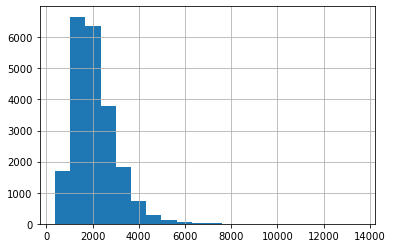

In [25]:
df['sqft_living'].hist(bins=20)

sqft_living looks approximately normal about the mean, so we can use our function for this column.

In [26]:
outlier_sqft_living = outlier_finder(df['sqft_living'])

<AxesSubplot:>

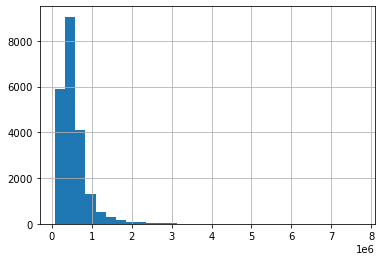

In [27]:
df['price'].hist(bins=30)

In [28]:
outlier_price = outlier_finder(df['price'])

<AxesSubplot:>

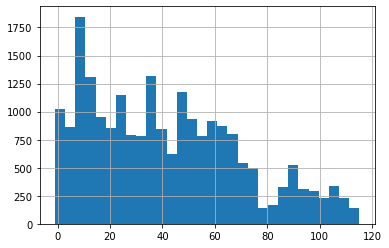

In [29]:
df['age'].hist(bins=30)

Age is NOT normal, so we will not use our function on this column.

<AxesSubplot:>

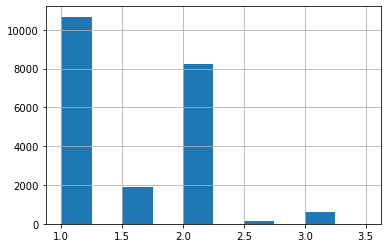

In [30]:
df['floors'].hist(bins=10)

Floors is bimodal and NOT normal, we should not use our function.

In [31]:
#df = df.loc[df['floors'] < 2.57]

In [32]:
#df = df.loc[df['age'] < 99.27]

In [33]:
df = df.loc[(df['sqft_living']> outlier_sqft_living[0] ) & (df['sqft_living'] < outlier_sqft_living[1]) ]

In [34]:
df = df.loc[df['price'] <= outlier_price[1]]

Here, we will take a look at the distributions of the two columns we changed. Linear regression works better when the distributions of the predictors and the target are both normally distributed.

<AxesSubplot:>

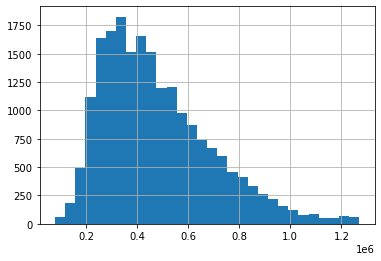

In [35]:
df['price'].hist(bins=30)

<AxesSubplot:>

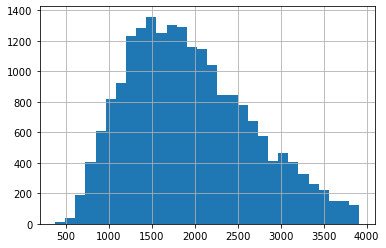

In [36]:
df['sqft_living'].hist(bins=30)

MUCH BETTER! Still a little skewed, but way better than before dropping the outliers.

In [37]:
# Here are dropping all of the null values for the view column, we can't really substitute nulls for this for this 
# column because its categoricaL, so we will drop them
df = df.dropna(subset=['view'])

# sanity check, make sure our line of code worked
#df['view'].isna().sum()

Here, we are looking at duplicate values. There are multiple homes that were sold multiple times. We know this because some rows have the same value for the id column.

In [38]:
ids = df['id']

dups = df[ids.isin(ids[ids.duplicated()])].sort_values('id')
dups

#We have decided to keep duplicate Ids because they have different prices and its more data for our model

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,NONE,...,0.0,1991,0,98002,47.3262,-122.214,2060,7316,2014,23
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,NO,NONE,...,0.0,1991,0,98002,47.3262,-122.214,2060,7316,2015,24
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,NO,NONE,...,0.0,1925,0,98055,47.4840,-122.211,1480,6969,2015,90
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,NO,NONE,...,0.0,1925,0,98055,47.4840,-122.211,1480,6969,2014,89
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,NO,NONE,...,0.0,1980,0,98023,47.2977,-122.367,1830,6956,2014,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,6/27/2014,260000.0,2,1.00,700,4800,1.0,NO,NONE,...,0.0,1922,0,98122,47.6147,-122.300,1440,4800,2014,92
15186,9834200305,2/10/2015,615000.0,3,1.00,1790,3876,1.5,NO,NONE,...,700.0,1904,0,98144,47.5750,-122.288,1360,4080,2015,111
15185,9834200305,7/16/2014,350000.0,3,1.00,1790,3876,1.5,NO,NONE,...,?,1904,0,98144,47.5750,-122.288,1360,4080,2014,110
1084,9834200885,7/17/2014,360000.0,4,2.50,2080,4080,1.0,NO,NONE,...,1040.0,1962,0,98144,47.5720,-122.290,1340,4080,2014,52


As you can see above, there are 301 duplicated valued. We define duplicate values based on the id. So, if they have the same id they are duplicates. It seems as though the only difference between these values is is the price. 

We decided to keep all of the duplicated because it is more data for our model to use, and they have different prices showing our model that homes with similar features can sell for different prices.

## DataFrame Creation for Modeling

The first Dataframe we are creating is one with all of our numerical data. We called this Dataframe df_nums and added the price, bedrooms, age, sqft_living and floors columns to it.

In [39]:
df_nums = df[['price', 'bedrooms', 'age', 'sqft_living', 'floors']]

In [40]:
# Here we are dropping the price column from our numerical Dataframe, so that we can scale the numerical values 
# to make them easier to compare in reference to each other
df_scale = df_nums.drop('price',axis=1)

In [41]:
# here we are saving off the price series, so that we can add it back to the Dataframe after scaling
df_price = df_nums['price']
df_price.shape

(20249,)

In [42]:
# Here we are resetting the index of our price Dataframe to  adjust for standard scaler!
df_price = df_price.reset_index(drop=True)

In [43]:
# Instantiating our StandardScalar Object
ss = StandardScaler()

ss.fit(df_scale)

df_scaled_new = ss.transform(df_scale)

In [44]:
# Turning our StandardScalar object back into a dataframe, with the same column names as before 
df_scaled_new = pd.DataFrame(df_scaled_new, columns=df_scale.columns)

In [45]:
# adding price back into the dataframe and renaming the new one new_df
new_df = pd.concat([df_price, df_scaled_new], axis=1)

Now, we are creating a new Dataframe with all of the categorical features that we are adding to our model

In [46]:
df_cat = df[['view','condition','grade']]

In [47]:
# dummying our all of our categorical variables
df_cats = pd.get_dummies(df_cat)

In [48]:
df_cats.columns # checking to make sure our columns all got dummeid out

Index(['view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

Here we take a look at the value counts of all of our categorical variables. We are doing this, so that we can get a better idea of which column for each of our dummied variable to drop.

For view, it looks like no view is the most common, so that is the column we will drop. No view is our baseline. 

For grade, it looks like 7 Average is the most common house grade, so that is the column we will drop. Houses with an average grade score of 7 will be our baseline.

For condition, it looks like Average is our most common condition, so that is the column we will drop. Houses with Average conditions are our baseline. 

In [49]:
#figuring out which ones to drop!!
df['view'].value_counts()

NONE         18663
AVERAGE        791
GOOD           351
FAIR           279
EXCELLENT      165
Name: view, dtype: int64

In [50]:
#figuring out which ones to drop!!
df_cat['grade'].value_counts()

7 Average        8928
8 Good           5948
9 Better         2285
6 Low Average    2031
10 Very Good      695
5 Fair            242
11 Excellent       92
4 Low              27
3 Poor              1
Name: grade, dtype: int64

In [51]:
#figuring out which ones to drop!!
df['condition'].value_counts()

Average      13063
Good          5414
Very Good     1576
Fair           168
Poor            28
Name: condition, dtype: int64

In [52]:
# dropping the columns specified above
df_cats = df_cats.drop(['condition_Average', 'view_NONE','grade_7 Average'], axis=1)

In [53]:
# resetting our index
df_cats.reset_index(inplace=True, drop=True)

In [54]:
# Finally, we are concatenating our Dataframes to create our final Dataframe to use for analysis.
new_set = pd.concat([new_df, df_cats], axis=1)

In [55]:
new_set.shape

(20249, 21)

Our final Dataframe has 20,249 house entries in it and 21 features

# Data Modeling

## Linear Regression Assumption Functions

In [56]:
#Creating functions to check linear regression Assumptions! 
# LINEARITY FUNCTION
# this function prints a plot of the predictions vs the residuals
# THE RELATIONSHIP BETWEEN THE TARGET AND PREDICTOR SHOULD BE LINEAR
def linearity_test(endog, exog):
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    residuals = endog - predictions
    fig, ax = plt.subplots()
    ax.scatter(predictions, residuals)
    ax.set_xlabel('predicted Y')
    ax.set_ylabel('residual values')
    plt.suptitle('Residuals Vs. Predictions');

In [57]:
# INDEPENDENCE FUNCTION
# This function returns the Durbin Watson Test Statistic
# With this function, we are aiming for a value close to 2 which indicated no correlation between the residuals of regression analysis

def independence_test_DW(endog,exog):
    ''' POarameters Taken: endog, exog
        Returns: the durbin Watson Test Statistic
        Details: The Durbin-Watson test statistic is calculated on the null hypothesis that there is no correlation among the errors. 
        The test statistic has a range of 0 to 4, where 2 indicates no correlation, a score less than 2 indicates a positive correlation, and a score greater than 2 indicates a negative correlation.
    '''
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    residuals = endog - predictions
    dw = sm.stats.stattools.durbin_watson
    return dw(residuals)

In [58]:
# NORMALITY FUNCTION 
# In linear regression, we want our errors to be normally distributed
# this function prints a histogram of the residuals, idealy this histogram should be normally distributed
def normality_test(endog,exog):
    ''' Checking that the errors are normally distibuted.
    The test statistic of the Jarque-Bera test is always a positive number and if it’s far from zero, it indicates that the sample data do not have a normal distribution.
    Omnibus P value : A minimum value of 1000 is recommended. Multiple-testing correction provides Bonferroni correction and false discovery rate (FDR). A significance level must be specified in the significance level (a).
    '''
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    model = sm.OLS(endog=endog, exog=exog).fit()
    residuals = endog - predictions
    residuals.hist(bins=20);

In [59]:
# HOMOSKEDASTICITY FUNCTION 
# In linear regression, we want the variance of our error terms to be constant
# This function prints a scatter plot of the residuals vs the predictions

def homoskedasticity_test(endog,exog):
    ''' Often when errors are heteroskedastic they will be greater for greater values of the target. If the target has an exponential distribution, with lots of small values and few large values, then the model will tend to focus on the smaller values in calculating its betas, producing volatility for the higher end of the spectrum. And so we'll see greater divergence in the errors for larger values of the target.
    
    '''
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    residuals = endog - predictions
    fig, ax = plt.subplots()
    ax.scatter(endog, residuals)
    ax.set_xlabel('Y values')
    ax.set_ylabel('Residual Values')
    plt.suptitle('Residuals Vs. Predictions')
    # delete everything under this after testing it - before submission

    

In [130]:
def millions_formatter(x, pos):
    return f'{x / 1000000}'

In [236]:
# FUNCTION for Actual price vs Predicted price
# this function prints a plot of the actual values vs the predicted values
# THE RELATIONSHIP BETWEEN THE ACTUAL AND PREDICTOR SHOULD BE LINEAR
def Actual_Predicted(endog, exog):
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    actual = endog
    fig, ax = plt.subplots(figsize=(15,11))
    ax.scatter(predictions, actual)
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
    ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
    ax.set_xlabel('Predicted Price(million)', fontsize=12)
    ax.set_ylabel('Actual Price(million)', fontsize=12)
    plt.suptitle('Actual Price Vs. Predicted Price', fontsize=15)
    plt.savefig('./graphs/predicted_vs_actual', bbox_inches='tight');

## Simple Models


Model1:OLS(sqft_living)

Simple linear regression model, using sqft_living to predict price.

In [237]:
simple_X = df['sqft_living']
simple_Y = df['price']
simple_X_cons = sm.add_constant(simple_X)
simple_model = sm.OLS(endog = simple_Y, exog = simple_X_cons).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:35:55   Log-Likelihood:            -2.7277e+05
No. Observations:               20249   AIC:                         5.455e+05
Df Residuals:                   20247   BIC:                         5.456e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.237e+05   3489.641     35.447      0.000    1.17e+05    1.31e+05
sqft_living   182.3678      1.685    108.261      0.000     179.066     185.670
==============================================================================
Omnibus:                     1700.340   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2278.660
Skew:                           0.716   Prob(JB):                         0.00
Kurtosis:                       3.805   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

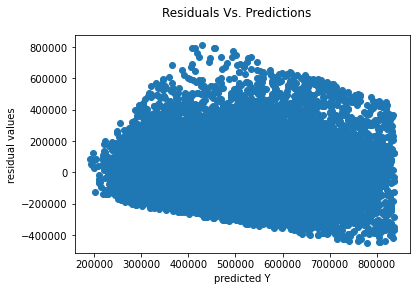

In [238]:
#Checking model for assumptions
linearity_test(simple_Y, simple_X_cons)

In [239]:
independence_test_DW(simple_Y, simple_X_cons)

1.9667458040248769

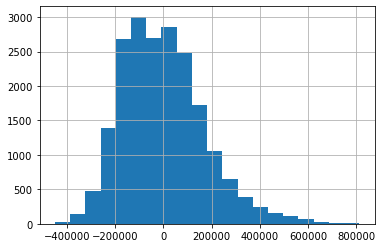

In [240]:
normality_test(simple_Y, simple_X_cons)

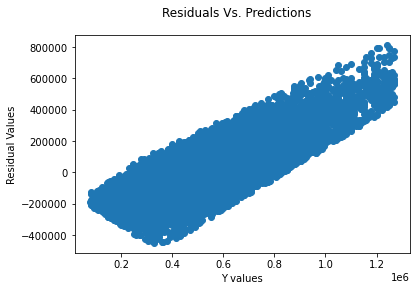

In [241]:
homoskedasticity_test(simple_Y, simple_X_cons)

Model2:OLS(bedrooms)
Simple linear regression model, using bedrooms to predict price.

In [242]:
simple_X2 = df['bedrooms']
simple_Y2 = df['price']
simple_X2_cons = sm.add_constant(simple_X2)
simple_model2 = sm.OLS(endog = simple_Y2, exog = simple_X2_cons).fit()
simple_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1756.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:35:56   Log-Likelihood:            -2.7655e+05
No. Observations:               20249   AIC:                         5.531e+05
Df Residuals:                   20247   BIC:                         5.531e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.474e+05   5696.344     43.434      0.000    2.36e+05    2.59e+05
bedrooms    6.962e+04   1661.088     41.910      0.000    6.64e+04    7.29e+04
==============================================================================
Omnibus:                     2245.621   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3109.029
Skew:                           0.887   Prob(JB):                         0.00
Kurtosis:                       3.732   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

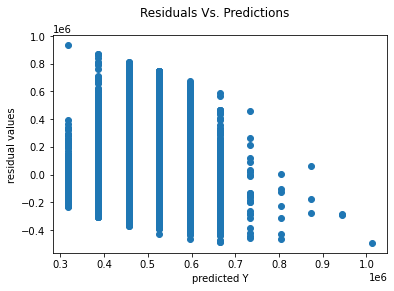

In [243]:
#Checking model for assumptions
linearity_test(simple_Y2, simple_X2_cons)

In [244]:
independence_test_DW(simple_Y2, simple_X2_cons)

1.9627650585509362

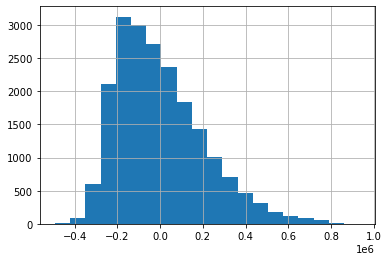

In [245]:
normality_test(simple_Y2, simple_X2_cons)

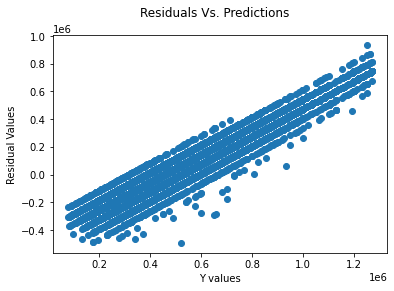

In [246]:
homoskedasticity_test(simple_Y2, simple_X2_cons)

Mode3:OLS(Age)
Simple linear regression model, using age of house to predict price.

In [247]:
simple_X3 = df['age']
simple_Y3 = df['price']
simple_X3_cons = sm.add_constant(simple_X3)
simple_model3 = sm.OLS(endog = simple_Y3, exog = simple_X3_cons).fit()
simple_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     92.60
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           7.13e-22
Time:                        13:35:57   Log-Likelihood:            -2.7735e+05
No. Observations:               20249   AIC:                         5.547e+05
Df Residuals:                   20247   BIC:                         5.547e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.995e+05   2675.453    186.705      0.000    4.94e+05    5.05e+05
age         -504.1137     52.387     -9.623      0.000    -606.797    -401.430
==============================================================================
Omnibus:                     2447.705   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3451.621
Skew:                           0.949   Prob(JB):                         0.00
Kurtosis:                       3.698   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

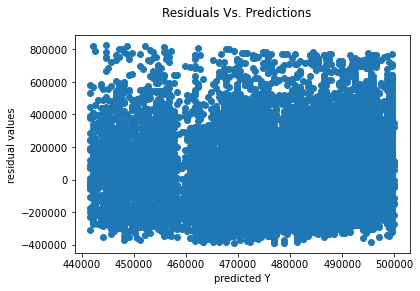

In [248]:
#Checking model for assumptions
linearity_test(simple_Y3, simple_X3_cons)

In [249]:
independence_test_DW(simple_Y3, simple_X3_cons)

1.977161284908422

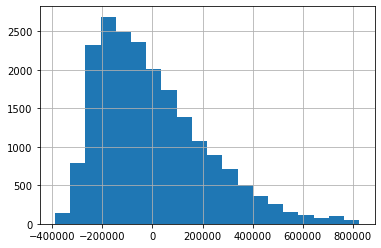

In [250]:
normality_test(simple_Y3, simple_X3_cons)

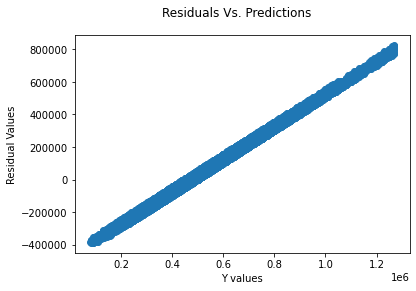

In [251]:
homoskedasticity_test(simple_Y3, simple_X3_cons)

Model4:OLS(floors)
Simple linear regression model, using floors to predict price.

In [252]:
simple_X4 = df['floors']
simple_Y4 = df['price']
simple_X4_cons = sm.add_constant(simple_X4)
simple_model4 = sm.OLS(endog = simple_Y4, exog = simple_X4_cons).fit()
simple_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1467.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          7.07e-310
Time:                        13:35:58   Log-Likelihood:            -2.7668e+05
No. Observations:               20249   AIC:                         5.534e+05
Df Residuals:                   20247   BIC:                         5.534e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.249e+05   4264.038     76.186      0.000    3.17e+05    3.33e+05
floors      1.043e+05   2722.556     38.298      0.000    9.89e+04     1.1e+05
==============================================================================
Omnibus:                     2415.116   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3407.430
Skew:                           0.933   Prob(JB):                         0.00
Kurtosis:                       3.744   Cond. No.                         6.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

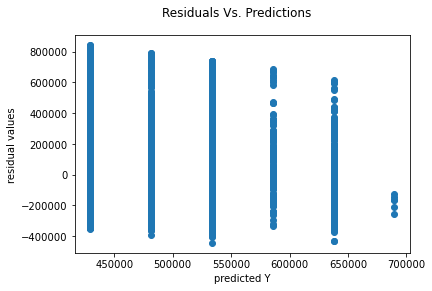

In [253]:
#Checking model for assumptions
linearity_test(simple_Y4, simple_X4_cons)

In [254]:
independence_test_DW(simple_Y4, simple_X4_cons)

1.9791680481346094

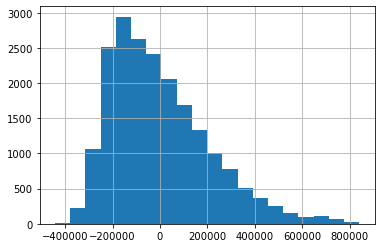

In [255]:
normality_test(simple_Y4, simple_X4_cons)

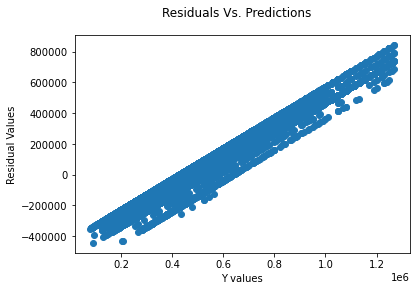

In [256]:
homoskedasticity_test(simple_Y4, simple_X4_cons)

Model5:OLS(view)
Simple linear regression model, using view to predict price.

In [257]:
df_view = pd.get_dummies(df['view'])
df_view_new = pd.concat([df['price'], df_view], axis=1)
df_view_new = df_view_new.drop(['NONE'], axis=1)
y5 = df_view_new['price']
x5 = sm.add_constant(df_view_new.drop('price', axis=1))

model = sm.OLS(y5,x5)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     393.9
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:35:59   Log-Likelihood:            -2.7663e+05
No. Observations:               20249   AIC:                         5.533e+05
Df Residuals:                   20244   BIC:                         5.533e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.621e+05   1518.738    304.291      0.000    4.59e+05    4.65e+05
AVERAGE     1.706e+05   7531.803     22.649      0.000    1.56e+05    1.85e+05
EXCELLENT   3.712e+05   1.62e+04     22.878      0.000    3.39e+05    4.03e+05
FAIR        1.814e+05   1.25e+04     14.494      0.000    1.57e+05    2.06e+05
GOOD        2.275e+05   1.12e+04     20.348      0.000    2.06e+05    2.49e+05
==============================================================================
Omnibus:                     2168.512   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2953.409
Skew:                           0.877   Prob(JB):                         0.00
Kurtosis:                       3.653   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

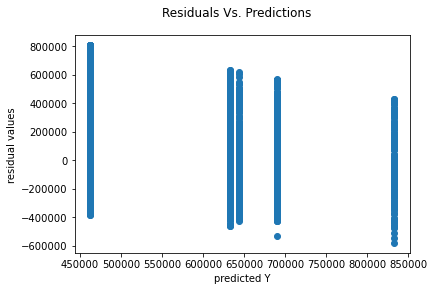

In [258]:
#Checking model for assumptions
linearity_test(y5, x5)

In [259]:
independence_test_DW(y5, x5)

1.9652640706416513

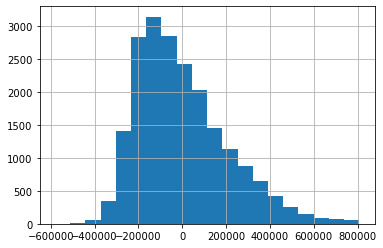

In [260]:
normality_test(y5, x5)

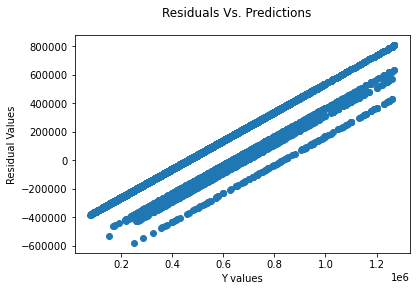

In [261]:
homoskedasticity_test(y5, x5)

Model6:OLS(grade)
Simple linear regression model, using grade to predict price.

In [262]:
df_grade = pd.get_dummies(df['grade'])
df_grade_new = pd.concat([df['price'], df_grade], axis=1)
df_grade_new = df_grade_new.drop(['7 Average'], axis=1)
y6 = df_grade_new['price']
x6 = sm.add_constant(df_grade_new.drop('price', axis=1))

model = sm.OLS(y6,x6)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1631.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:36:00   Log-Likelihood:            -2.7236e+05
No. Observations:               20249   AIC:                         5.447e+05
Df Residuals:                   20240   BIC:                         5.448e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.013e+05   1777.793    225.715      0.000    3.98e+05    4.05e+05
10 Very Good   4.297e+05   6615.216     64.961      0.000    4.17e+05    4.43e+05
11 Excellent   5.464e+05   1.76e+04     31.040      0.000    5.12e+05    5.81e+05
3 Poor        -1.393e+05   1.68e+05     -0.829      0.407   -4.69e+05     1.9e+05
4 Low         -1.893e+05   3.24e+04     -5.846      0.000   -2.53e+05   -1.26e+05
5 Fair        -1.528e+05   1.09e+04    -13.958      0.000   -1.74e+05   -1.31e+05
6 Low Average -9.938e+04   4129.635    -24.065      0.000   -1.07e+05   -9.13e+04
8 Good         1.289e+05   2811.505     45.844      0.000    1.23e+05    1.34e+05
9 Better       3.009e+05   3938.211     76.402      0.000    2.93e+05    3.09e+05
==============================================================================
Omnibus:                     2287.523   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3469.236
Skew:                           0.834   Prob(JB):                         0.00
Kurtosis:                       4.152   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

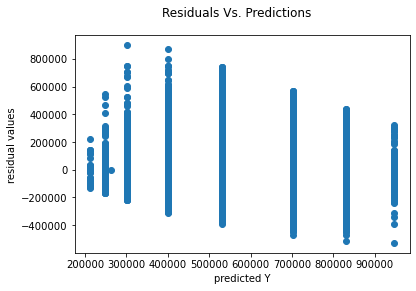

In [263]:
#Checking model for assumptions
linearity_test(y6, x6)

In [264]:
independence_test_DW(y6, x6)

1.9636830173891189

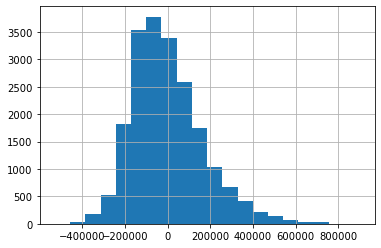

In [265]:
normality_test(y6, x6)

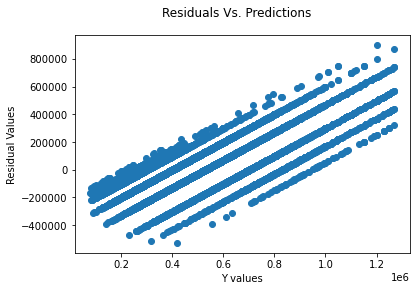

In [266]:
homoskedasticity_test(y6, x6)

In [267]:
# creating a new Dataframe for condition's dummied columns
df_con = pd.get_dummies(df['condition'])
df_con_new = pd.concat([df['price'], df_con], axis=1)

Model7:OLS(condition)
Simple linear regression model, using condition to predict price.

In [268]:
df_con = pd.get_dummies(df['condition'])
df_con_new = pd.concat([df['price'], df_con], axis=1)
df_con_new = df_con_new.drop(['Average'], axis=1)

y7 = df_con_new['price']
x7 = sm.add_constant(df_con_new.drop('price', axis=1))

model = sm.OLS(y7,x7)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     53.31
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           9.31e-45
Time:                        13:36:01   Log-Likelihood:            -2.7729e+05
No. Observations:               20249   AIC:                         5.546e+05
Df Residuals:                   20244   BIC:                         5.546e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.779e+05   1874.780    254.898      0.000    4.74e+05    4.82e+05
Fair       -1.661e+05   1.66e+04     -9.983      0.000   -1.99e+05   -1.33e+05
Good       -7123.2053   3463.434     -2.057      0.040   -1.39e+04    -334.593
Poor       -1.782e+05   4.05e+04     -4.396      0.000   -2.58e+05   -9.87e+04
Very Good   5.035e+04   5713.838      8.811      0.000    3.91e+04    6.15e+04
==============================================================================
Omnibus:                     2384.946   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3338.725
Skew:                           0.932   Prob(JB):                         0.00
Kurtosis:                       3.694   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

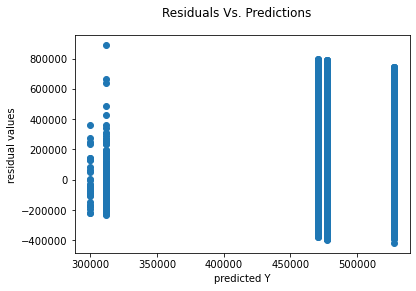

In [269]:
#Checking model for assumptions
linearity_test(y7, x7)

In [270]:
independence_test_DW(y7, x7)

1.9738314014591531

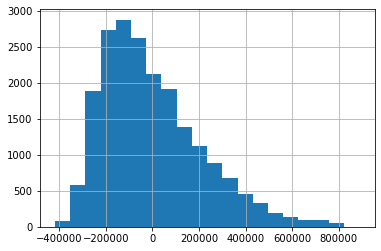

In [271]:
normality_test(y7, x7)

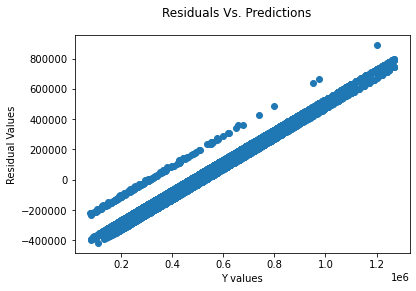

In [272]:
homoskedasticity_test(y7, x7)

## Multiple Linear Regression Model 1

In [273]:
#testing model with bedrooms, age, floor, sqft_living
y22 = new_df['price']

x22 = sm.add_constant(new_df.drop('price', axis=1))

model22 = sm.OLS(y22,x22)
model22.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     3738.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:36:02   Log-Likelihood:            -2.7179e+05
No. Observations:               20249   AIC:                         5.436e+05
Df Residuals:                   20244   BIC:                         5.436e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.783e+05   1148.012    416.605      0.000    4.76e+05    4.81e+05
bedrooms    -2.911e+04   1439.317    -20.225      0.000   -3.19e+04   -2.63e+04
age          5.463e+04   1372.848     39.791      0.000    5.19e+04    5.73e+04
sqft_living   1.55e+05   1542.924    100.491      0.000    1.52e+05    1.58e+05
floors       3.664e+04   1360.050     26.940      0.000     3.4e+04    3.93e+04
==============================================================================
Omnibus:                     1552.032   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2218.438
Skew:                           0.637   Prob(JB):                         0.00
Kurtosis:                       4.004   Cond. No.                         2.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

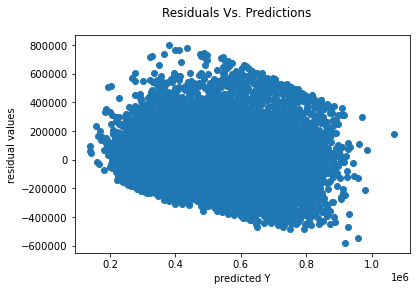

In [274]:
linearity_test(y22,x22)

In [275]:
independence_test_DW(y22,x22)

1.974157044091803

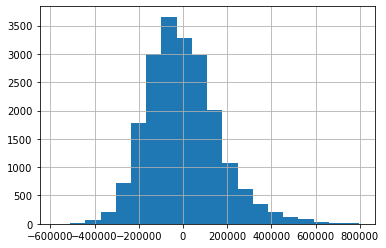

In [276]:
normality_test(y22,x22)

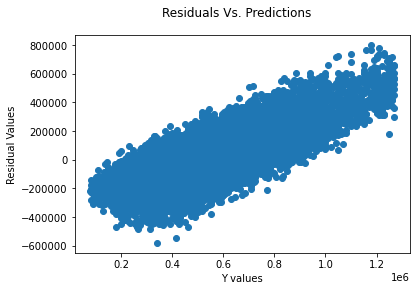

In [277]:
homoskedasticity_test(y22,x22)

For this model, our adjusted R^2 is a little bit higher than our previous models. at .425. We see that all of our features are statistically significant to our model, with p values lower than our alpha of .05. We also see that it passes all of our assumptions except homoskedasticity. There is a durbin Watson score of 1.97 for this model, which means it passes our independence assumption for linear regression.

## Multiple Linear Regression Model 2

In [278]:
#this model is used to check different situation
y33 = new_set['price']

x33 = sm.add_constant(new_set.drop(['price','sqft_living','age','grade_3 Poor','condition_Fair'], axis=1))

model33 = sm.OLS(y33,x33)
model33.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1066.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:36:03   Log-Likelihood:            -2.7120e+05
No. Observations:               20249   AIC:                         5.424e+05
Df Residuals:                   20232   BIC:                         5.426e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.751e+05   1960.799    191.302      0.000    3.71e+05    3.79e+05
bedrooms             2.145e+04   1189.745     18.028      0.000    1.91e+04    2.38e+04
floors               5420.8492   1316.608      4.117      0.000    2840.191    8001.507
view_AVERAGE         1.049e+05   5804.428     18.071      0.000    9.35e+04    1.16e+05
view_EXCELLENT       2.729e+05   1.25e+04     21.898      0.000    2.48e+05    2.97e+05
view_FAIR            1.298e+05   9601.749     13.513      0.000    1.11e+05    1.49e+05
view_GOOD            1.341e+05   8606.431     15.587      0.000    1.17e+05    1.51e+05
condition_Good       4.189e+04   2685.379     15.600      0.000    3.66e+04    4.72e+04
condition_Poor       2678.8256   3.03e+04      0.089      0.929   -5.66e+04     6.2e+04
condition_Very Good  1.115e+05   4324.083     25.778      0.000    1.03e+05     1.2e+05
grade_10 Very Good   4.153e+05   6472.234     64.174      0.000    4.03e+05    4.28e+05
grade_11 Excellent   5.178e+05   1.68e+04     30.900      0.000    4.85e+05    5.51e+05
grade_4 Low         -1.455e+05   3.07e+04     -4.740      0.000   -2.06e+05   -8.54e+04
grade_5 Fair         -1.39e+05   1.05e+04    -13.263      0.000    -1.6e+05   -1.18e+05
grade_6 Low Average -8.743e+04   4005.444    -21.828      0.000   -9.53e+04   -7.96e+04
grade_8 Good         1.194e+05   2833.729     42.146      0.000    1.14e+05    1.25e+05
grade_9 Better       2.816e+05   4052.688     69.495      0.000    2.74e+05     2.9e+05
==============================================================================
Omnibus:                     1761.046   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2543.514
Skew:                           0.697   Prob(JB):                         0.00
Kurtosis:                       4.035   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

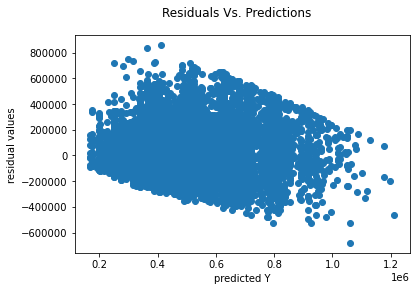

In [279]:
linearity_test(y33,x33)

In [280]:
independence_test_DW(y33,x33)

1.96872569042975

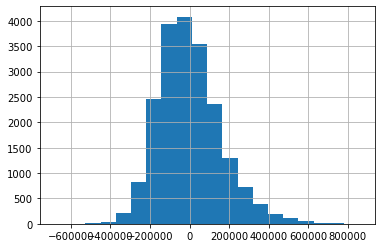

In [281]:
normality_test(y33,x33)

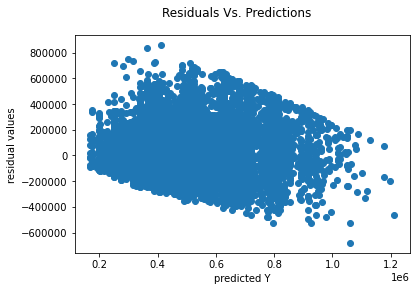

In [282]:
linearity_test(y33,x33)

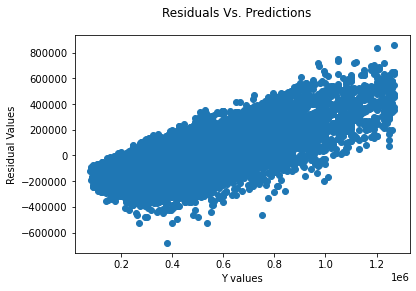

In [283]:
homoskedasticity_test(y33,x33)

Here, we see that with this model, our R^2 value was increased however, not all of our features are significantly significant to our model. Our model still seems to pass all of our linear regression assumptions except homoskedasticity.

## Multiple Linear Regression Model 3

First, I will find the standard deviation of all of our columns so that it is easier for us to read our model. Scaling our numerical features made it so that a change in one unit of standard deviation of our numerical features, leads to an increase of price by a factor of the coefficient. 

Here is the formula for multiple linear regression 
yi=β0+β1xi,1+β2xi,2+…+βkxi,k+ϵi.

What we are looking to do with this model, is to increase our R Squared value from the simple models.

In [284]:
numerical_std = df_nums.drop('price',axis=1).std()
numerical_std

bedrooms         0.874109
age             28.827468
sqft_living    715.113453
floors           0.536859
dtype: float64

In [285]:
y = new_set['price']
x = sm.add_constant(new_set.drop('price', axis=1))

model = sm.OLS(endog=y,exog=x)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     1230.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:36:04   Log-Likelihood:            -2.6933e+05
No. Observations:               20249   AIC:                         5.387e+05
Df Residuals:                   20228   BIC:                         5.389e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.085e+05   1902.966    214.673      0.000    4.05e+05    4.12e+05
bedrooms            -1.152e+04   1320.336     -8.725      0.000   -1.41e+04   -8931.384
age                  6.637e+04   1351.320     49.114      0.000    6.37e+04     6.9e+04
sqft_living           7.74e+04   1739.385     44.500      0.000     7.4e+04    8.08e+04
floors               2.126e+04   1257.907     16.899      0.000    1.88e+04    2.37e+04
view_AVERAGE         6.361e+04   5332.336     11.929      0.000    5.32e+04    7.41e+04
view_EXCELLENT       2.222e+05   1.14e+04     19.505      0.000       2e+05    2.45e+05
view_FAIR            8.595e+04   8783.203      9.786      0.000    6.87e+04    1.03e+05
view_GOOD             8.84e+04   7884.244     11.212      0.000    7.29e+04    1.04e+05
condition_Fair      -4.455e+04   1.14e+04     -3.920      0.000   -6.68e+04   -2.23e+04
condition_Good       9221.0404   2533.589      3.640      0.000    4255.000    1.42e+04
condition_Poor      -5.319e+04   2.76e+04     -1.925      0.054   -1.07e+05     955.571
condition_Very Good  5.091e+04   4103.644     12.405      0.000    4.29e+04    5.89e+04
grade_10 Very Good   3.136e+05   6685.427     46.909      0.000    3.01e+05    3.27e+05
grade_11 Excellent   3.939e+05   1.57e+04     25.089      0.000    3.63e+05    4.25e+05
grade_3 Poor        -1.768e+05   1.45e+05     -1.221      0.222   -4.61e+05    1.07e+05
grade_4 Low         -1.468e+05   2.81e+04     -5.230      0.000   -2.02e+05   -9.18e+04
grade_5 Fair        -1.471e+05   9673.162    -15.210      0.000   -1.66e+05   -1.28e+05
grade_6 Low Average -9.465e+04   3796.725    -24.929      0.000   -1.02e+05   -8.72e+04
grade_8 Good         1.027e+05   2776.348     37.008      0.000    9.73e+04    1.08e+05
grade_9 Better       2.258e+05   4283.916     52.701      0.000    2.17e+05    2.34e+05
==============================================================================
Omnibus:                     1578.504   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2626.844
Skew:                           0.590   Prob(JB):                         0.00
Kurtosis:                       4.312   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

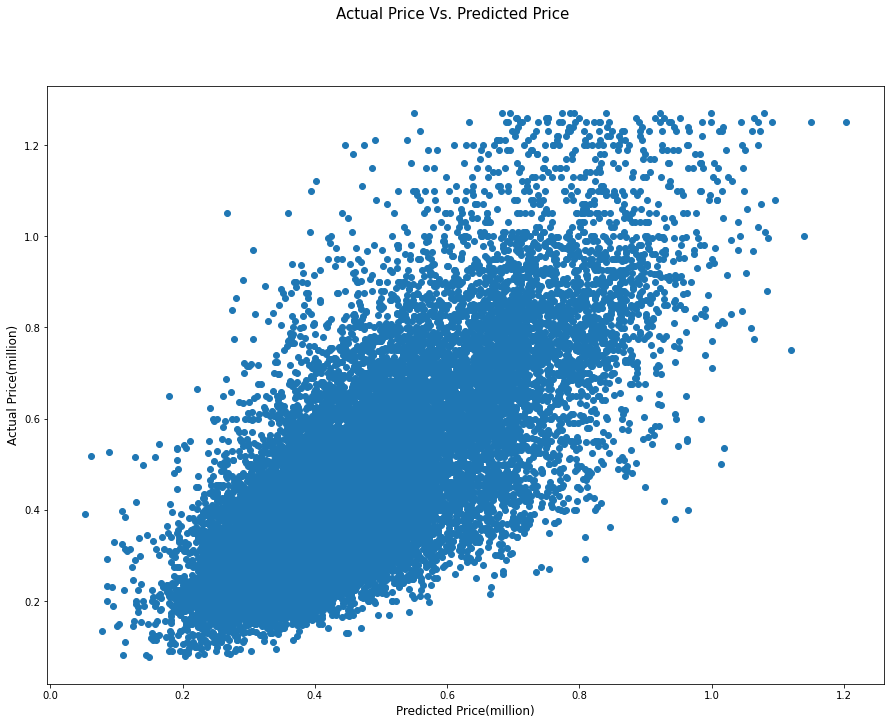

In [286]:
Actual_Predicted(y,x)

In [287]:
# printing our all of the standard deviations so that it is easier to interpret our model statistics
numerical_std

bedrooms         0.874109
age             28.827468
sqft_living    715.113453
floors           0.536859
dtype: float64

IMPORTANT MODEL STATISTICS


We have an R Squared value of 0.548

All features except grade_3 Poor and condition_Poor are statistically significant to our model with an alpha of .05.

Some interesting statistics are that, for our bedroom feature, it seems like for every increase of 1 standard deviation of bedrooms (or 0.874109 bedrooms) The price of a house will decrease by a factor of 11,000 dollars.

Another interestinf observation is that, as you increase the age of the house by 1 standard deviation (28.827468 years), the price of the house increases by a factor of 6,6370 dollars. This model seems to favor older houses, which we didn't expect to be the case.

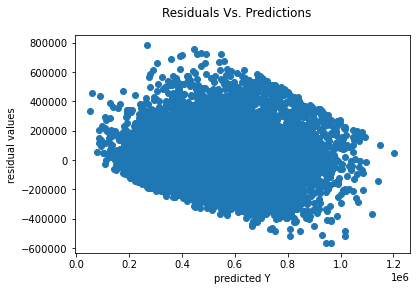

In [288]:
linearity_test(y,x)

In [289]:
independence_test_DW(y,x)

1.974723084768019

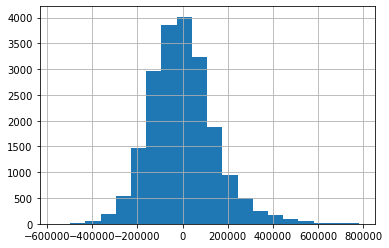

In [290]:
normality_test(y,x)

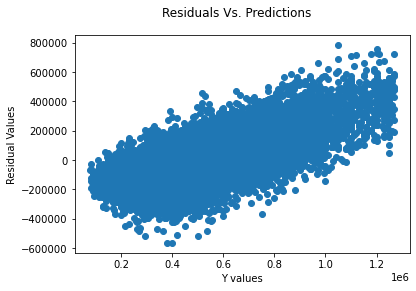

In [291]:
homoskedasticity_test(y,x)

So, for this first model, our assumptions look ok. Our model passes the linearity test, the independence test and the normality test. However, there is a slight upwards treand for our homoskedasticity test. As for the multicollinearity of our model, we have a condition number of 208, so there isn't a lot of multicollinearity between our features.

<AxesSubplot:>

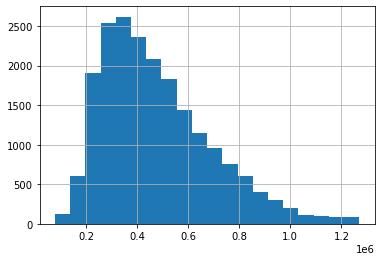

In [292]:
#checking the distribution of y, to see if logging it will fix our broken assumptions
y.hist(bins=20)

It looks as though our predictor price is right skewed. Logging this value will make our predictor more normal, lets do that.

In [293]:
#our distribution of prices is right tailed, logging the y value will help make this more normal
y_log = np.log(y)

<AxesSubplot:>

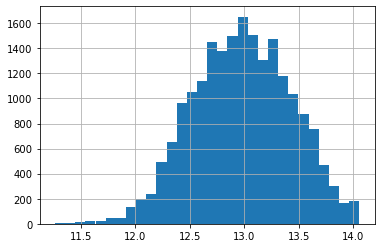

In [294]:
y_log.hist(bins=30)

## Multiple Linear Regression Model 4

In this model, we are taking the log of our predictor value. Since we saw earlier that the price column's values are right skewed, we have decided to take the log of this column's value in order to make our predictor more normal.This will drastically chande our model results.

It is important to note the change in interpretation of our model's results when we take the log of our predicted value. We interpret our coefficient values much differently when we take the log of our predictor. For example, we can now say that an increase in one unit of our feature x, will result in an increase of price by a factor of e (2.71828...) raised to the value of the coefficient. 

In [295]:
#building a model with our new log of y
# it is IMPORTANT to remember, when presenting that we used the log of y

model_logy = sm.OLS(y_log,x)
model_logy.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1142.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:36:06   Log-Likelihood:                -4930.4
No. Observations:               20249   AIC:                             9903.
Df Residuals:                   20228   BIC:                         1.007e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.8592      0.004   3166.881      0.000      12.851      12.867
bedrooms               -0.0274      0.003     -9.718      0.000      -0.033      -0.022
age                     0.1384      0.003     47.987      0.000       0.133       0.144
sqft_living             0.1659      0.004     44.704      0.000       0.159       0.173
floors                  0.0510      0.003     19.001      0.000       0.046       0.056
view_AVERAGE            0.1145      0.011     10.065      0.000       0.092       0.137
view_EXCELLENT          0.3380      0.024     13.901      0.000       0.290       0.386
view_FAIR               0.1627      0.019      8.680      0.000       0.126       0.199
view_GOOD               0.1407      0.017      8.364      0.000       0.108       0.174
condition_Fair         -0.1745      0.024     -7.197      0.000      -0.222      -0.127
condition_Good          0.0115      0.005      2.118      0.034       0.001       0.022
condition_Poor         -0.1791      0.059     -3.039      0.002      -0.295      -0.064
condition_Very Good     0.0919      0.009     10.492      0.000       0.075       0.109
grade_10 Very Good      0.5133      0.014     35.980      0.000       0.485       0.541
grade_11 Excellent      0.5797      0.034     17.303      0.000       0.514       0.645
grade_3 Poor           -0.4259      0.309     -1.378      0.168      -1.032       0.180
grade_4 Low            -0.5693      0.060     -9.502      0.000      -0.687      -0.452
grade_5 Fair           -0.4866      0.021    -23.575      0.000      -0.527      -0.446
grade_6 Low Average    -0.2750      0.008    -33.939      0.000      -0.291      -0.259
grade_8 Good            0.2259      0.006     38.139      0.000       0.214       0.238
grade_9 Better          0.4145      0.009     45.344      0.000       0.397       0.432
==============================================================================
Omnibus:                       73.543   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.629
Skew:                          -0.128   Prob(JB):                     2.29e-17
Kurtosis:                       3.158   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

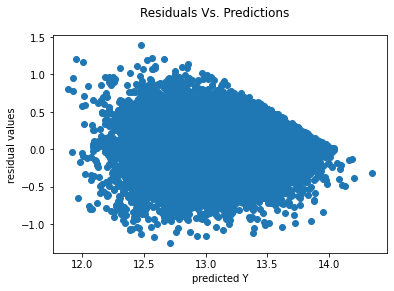

In [296]:
linearity_test(y_log,x)

In [297]:
independence_test_DW(y_log,x)

1.970599922659849

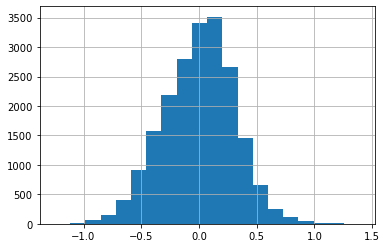

In [298]:
normality_test(y_log,x)

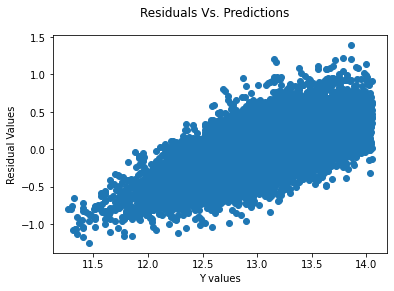

In [299]:
homoskedasticity_test(y_log,x)

The main changes to note with this model is that our R^2 value was lowered.

Here we created some graphs to help explain our findings

Model 3 will be our final model. We see that with model 4, taking the log of y did more harm than good, and it lowered our R^2 value which is not something we want. It also did not make our linearity assumption any better, so we are going to stick with model 3 for our final model, with an R^2 value of .530.

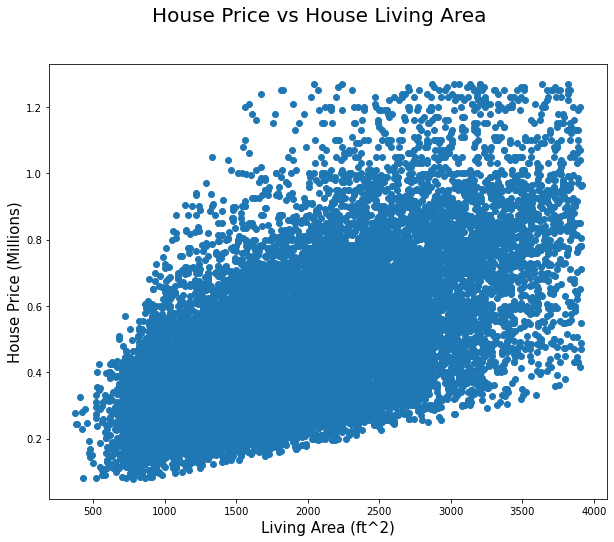

In [300]:

y = df['price']
x = df['sqft_living']
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x, y)
ax.set_ylabel('House Price (Millions)', size = 15)
ax.set_xlabel('Living Area (ft^2)', size = 15)
plt.suptitle('House Price vs House Living Area', size = 20)
ax.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

    
plt.savefig('./graphs/house_price_vs_house_living_area.png', bbox_inches='tight')


Here is a graph that shows the average house price for each of our house grades.

In [301]:
Grade_list = ['7 Average', '8 Good', '6 Low Average','10 Very Good','11 Excellent','4 Low' ]

In [302]:
df['grade'].value_counts()

7 Average        8928
8 Good           5948
9 Better         2285
6 Low Average    2031
10 Very Good      695
5 Fair            242
11 Excellent       92
4 Low              27
3 Poor              1
Name: grade, dtype: int64

In [303]:
df_grade_price = pd.concat([df['price'], df['grade']], axis=1)

In [304]:
df_cond_price = pd.concat([df['price'], df['condition']], axis=1)

In [305]:
df_cond_price

,price,condition
0,221900.0,Average
1,538000.0,Average
2,180000.0,Average
3,604000.0,Very Good
4,510000.0,Average
...,...,...
21592,360000.0,Average
21593,400000.0,Average
21594,402101.0,Average
21595,400000.0,Average


In [306]:
df_grade_price

,price,grade
0,221900.0,7 Average
1,538000.0,7 Average
2,180000.0,6 Low Average
3,604000.0,7 Average
4,510000.0,8 Good
...,...,...
21592,360000.0,8 Good
21593,400000.0,8 Good
21594,402101.0,7 Average
21595,400000.0,8 Good


In [144]:
group = df_grade_price.groupby('grade')['price'].mean().sort_values(ascending=True)
group = group/100000

<ipython-input-161-6d065e1948d6>:7: UserWarning: Legend does not support 'Associated with high House Price' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles, labels);
<ipython-input-161-6d065e1948d6>:7: UserWarning: Legend does not support 'Baseline' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles, labels);


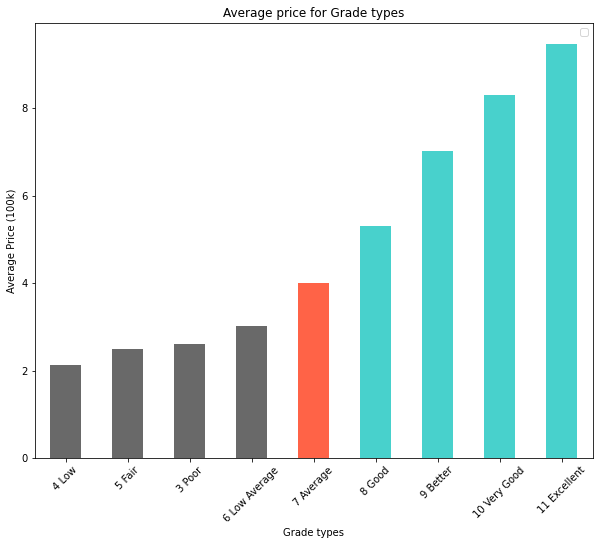

In [161]:
group.plot(kind = 'bar', title = 'Average price for Grade types', figsize=(10,8),
           color=['dimgray','dimgray','dimgray','dimgray','tomato','mediumturquoise','mediumturquoise',
                 'mediumturquoise','mediumturquoise'])
colors = {'Associated with high House Price':'dimgray', 'Baseline':'tomato', 'Associated with high House Price' : 'mediumturquoise'}         
labels = list(colors.keys())
handles = ['Associated with high House Price','Baseline','Associated with high House Price' ]
plt.legend(handles, labels);
plt.xlabel("Grade types")
plt.xticks(rotation = 45)
plt.ylabel("Average Price (100k)");
plt.savefig('./graphs/avg_house_price_per_grade.png', bbox_inches='tight');



In [154]:
groupco = df_cond_price.groupby('condition')['price'].mean().sort_values(ascending=True)
groupco = groupco/100000

<ipython-input-160-4a20e766b1d9>:6: UserWarning: Legend does not support 'Associated with high House Price' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles, labels);
<ipython-input-160-4a20e766b1d9>:6: UserWarning: Legend does not support 'Baseline' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles, labels);


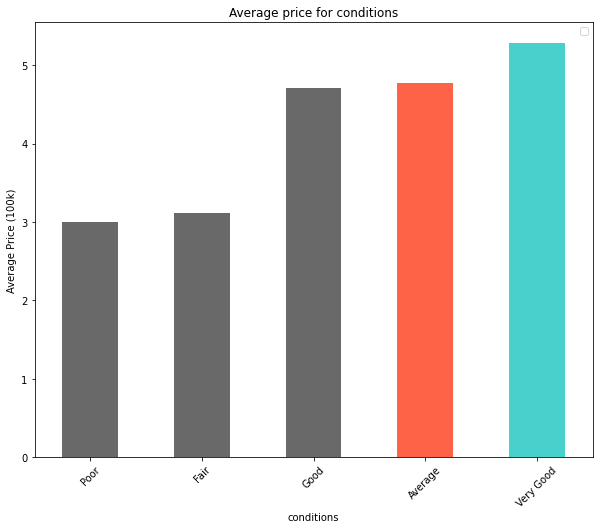

In [160]:
groupco.plot(kind = 'bar', title = 'Average price for conditions', figsize=(10,8),
           color=['dimgray','dimgray','dimgray','tomato','mediumturquoise'])
colors = {'Associated with high House Price':'dimgray', 'Baseline':'tomato', 'Associated with high House Price' : 'mediumturquoise'}         
labels = list(colors.keys())
handles = ['Associated with high House Price','Baseline','Associated with high House Price' ]
plt.legend(handles, labels);
plt.xlabel("conditions")
plt.xticks(rotation = 45)
plt.ylabel("Average Price (100k)");
plt.savefig('./graphs/avg_house_price_per_condition.png', bbox_inches='tight');


# Evaluation

We found that our models did a good job of fitting and predicting our data. Our model definitely improved from the baseline model. Our final R^2 value turned our to be .548. This means that our model explains abour 54.8 percent of the variability observed in our target variable, house price.

Based on our model, we came up with two recomendations we can lend to our clients. Those would be to purchase low grade houses in poor condition. Based on our coefficients in our model, we can say that, when you change from our baseline condition to a poor condition, the price decreases on average by a factor of 176,800 dollars. Based on this information, you can save close to 200,000 dollars by choosing a house that is in lower condition.

Our next recommendation would be to rennovate the house by adding floors or other features that add value. We found that based on our model, by adding one floor you increase the price of your house on average by a factor of 42,520 dollars. We found this number by multiplying our floors coefficient by two. We did this because the standard deviation for our house feature is .5 floors, but you can't really add .5 floors to a house, so we multiply the coeficient by two to get the average price increase when adding a floor to your house. Then, we recommend to sell your house. Our model suggests that taking these steps will increase the profitability of your investment.

# Conclusion

In conclusion, we recommend that our clients purchase low grade/condition houses, renovate them with features associated with high price for home, and finally sell them for an increased profit. Some reasons our analysis mught not fully solve the business problem is because our data is limited. If we had more we would be able to do more advanced analysis, and hopefully make better, more robust models. In the future we could apply other algorithms to our data to see if they fit our data better. We could also use more of the dataset. We were limited in this project because we only had a few days to come up with our model, however, with more time we could definitely include more of the featured in our dataset.